In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\mituc\Python\attack_classifier\data\df_attacks_enc.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,1,...,8,0.0,0.0,1.0,0.0,0.0,9,0.0,0.0,normal
1,0,1,0,239,486,0,0,0,0,1,...,8,0.0,0.0,1.0,0.0,0.0,19,0.0,0.0,normal
2,0,1,0,235,1337,0,0,0,0,1,...,8,0.0,0.0,1.0,0.0,0.0,29,0.0,0.0,normal
3,0,1,0,219,1337,0,0,0,0,1,...,6,0.0,0.0,1.0,0.0,0.0,39,0.0,0.0,normal
4,0,1,0,217,2032,0,0,0,0,1,...,6,0.0,0.0,1.0,0.0,0.0,49,0.0,0.0,normal


In [4]:
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 28) (163027, 28)
(330994, 1) (163027, 1)


KMEANS

In [58]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')
visualizer.fit(X)  
visualizer.show();

In [53]:
kmeans = KMeans(n_clusters=5)
km_fit = kmeans.fit(X)

In [54]:
labels = km_fit.labels_
labels

array([2, 2, 2, ..., 2, 2, 2])

In [55]:
centroids = km_fit.cluster_centers_
centroids

array([[-3.19948061e-16,  9.05664432e-14,  2.66384137e-14,
         1.34958324e-06,  1.98408998e-17,  1.73201297e-17,
         1.97238059e-15, -2.88584125e-18,  1.56294519e-17,
         1.11022302e-13, -2.65121312e-18,  7.23704950e-17,
         2.44623115e-18,  6.91178885e-19, -5.00088252e-18,
         1.22514845e-17,  0.00000000e+00,  0.00000000e+00,
        -1.03216047e-15,  9.92320240e-01,  4.07729406e-14,
        -1.21985755e-14,  1.00000000e+00,  1.28855260e-14,
         5.35335665e-15,  9.99928417e-01,  3.31947843e-05,
        -3.16587034e-15],
       [ 2.06679229e-07,  5.00143653e-01,  1.00491869e-01,
         1.14927987e-05,  1.46418755e-06,  2.18353158e-04,
         6.70382501e-04, -1.30019557e-18,  1.14922714e-05,
         8.04459002e-05,  1.17002764e-07,  1.89328804e-17,
        -6.16639986e-18,  8.20876532e-07, -4.72983198e-18,
         1.17364885e-17,  0.00000000e+00,  0.00000000e+00,
         1.39211559e-16,  2.17289841e-02,  9.99174050e-01,
         9.53858530e-05,  7.22

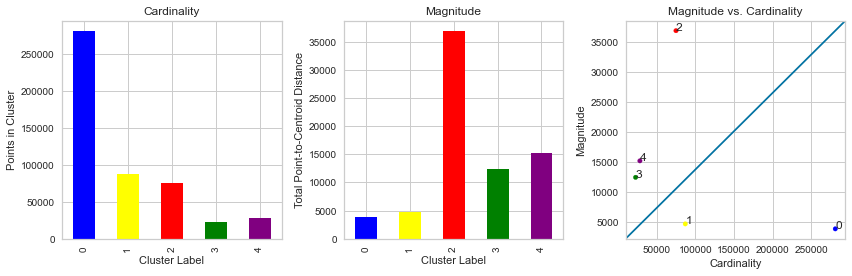

In [57]:
cluster_colors = ['blue', 'yellow', 'red', 'green', "purple"]

# iniciamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

# ploteamos la CARDINALIDAD
plot_cluster_cardinality(labels, # las labels que predijo nuestro modelo
                         ax=ax1, # sobre que eje lo queremos hacer
                         title="Cardinality", # título de la gráfica
                         color=cluster_colors # colores que vamos a querer usar
                        )


# ploteamos la MAGNITUD
plot_cluster_magnitude(X, # el dataframe del que sacaremos los datos
                       labels, # las labels que predijo nuestro modelo
                       centroids, # los centroides de nuestros clusters
                       euclidean, # la distancia que quiero usar para medir
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )

# ploteamos la RELACIÓN ENTRE CARDINALIDAD Y MAGNITUD
plot_magnitude_vs_cardinality(X,# el dataframe del que sacaremos los datos
                              labels, # las labels que predijo nuestro modelo
                              centroids, # los centroides de nuestros clusters
                              euclidean,# la distancia
                              color=cluster_colors,
                              ax=ax3,
                              title="Magnitude vs. Cardinality")
plt.tight_layout()
plt.show()

GAUSSIAN NAIVE BAYES

In [5]:
model1 = GaussianNB()

In [6]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [7]:
gaussian_train_time = end_time - start_time
print("Gaussian Naive Bayes train time: ", gaussian_train_time)

Gaussian Naive Bayes train time:  0.42877197265625


In [8]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [9]:
gaussian_test_time = end_time - start_time
print("Gaussian Naive Bayes test time: ", gaussian_test_time)

Gaussian Naive Bayes test time:  0.2849299907684326


In [10]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8465047704792232
Test score is: 0.8462524612487502


DECISION TREE CLASSIFIER

In [11]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [12]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [13]:
decision_train_time = end_time - start_time
print("Decision Tree train time: ", decision_train_time)

Decision Tree train time:  0.7116339206695557


In [14]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [15]:
decision_test_time = end_time - start_time
print("Decision Tree test time: ", decision_test_time)

Decision Tree test time:  0.029202699661254883


In [16]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9921720635419373
Test score is: 0.9917743686628595


RANDOM FOREST CLASSIFIER

In [17]:
model3 = RandomForestClassifier(n_estimators=30)

In [18]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [19]:
random_forest_train_time = end_time - start_time
print("Random Forest train time: ", random_forest_train_time)

Random Forest train time:  5.436673402786255


In [20]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [21]:
random_forest_test_time = end_time - start_time
print("Random Forest test time: ", random_forest_test_time)

Random Forest test time:  0.3957645893096924


In [22]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999395759439749
Test score is: 0.9996810344298798


SUPPORT VECTOR MACHINE CLASSIFIER

In [23]:
model4 = SVC(gamma = 'scale')

In [24]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [25]:
vm_train_time = end_time - start_time
print("Support Vector Machine train time: ", vm_train_time)

Support Vector Machine train time:  115.39157700538635


In [26]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [27]:
vm_test_time = end_time - start_time
print("Support Vector Machine test time: ", vm_test_time)

Support Vector Machine test time:  68.14210724830627


In [28]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.993229484522378
Test score is: 0.9932526514013016


LOGISTIC REGRESSION

In [29]:
model5 = LogisticRegression(max_iter=1200000)

In [30]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [31]:
logistic_train_time = end_time - start_time
print('Logistic Regression train time: ', logistic_train_time)

Logistic Regression train time:  15.796597003936768


In [32]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [33]:
logistic_test_time = end_time - start_time
print('Logistic Regression test time: ', logistic_test_time)

Logistic Regression test time:  0.027772188186645508


In [34]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9913049783379759
Test score is: 0.9913449919338514


GRADIENT BOOSTING CLASSIFIER

In [35]:
model6 = GradientBoostingClassifier(random_state=0)

In [36]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [37]:
gradient_train_time = end_time - start_time
print('Gradient Boosting train time: ', gradient_train_time)

Gradient Boosting train time:  9912.751189947128


In [38]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [39]:
gradient_test_time = end_time - start_time
print('Gradient Boosting test time: ', gradient_test_time)

Gradient Boosting test time:  1.3112201690673828


In [40]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9989093457887455
Test score is: 0.9987302716727904


ARTIFICIAL NEURAL NETWORK

In [41]:
def fun():
    model = Sequential()
    
    #here 28 is output dimension
    model.add(Dense(28, input_dim =28, activation = 'relu', kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5, activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [42]:
model7 = KerasClassifier(build_fn=fun, epochs=100, batch_size=64)

C:\Users\mituc\AppData\Local\Temp/ipykernel_19204/4004793477.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model7 = KerasClassifier(build_fn=fun, epochs=100, batch_size=64)


In [43]:
start = time.time()
model7.fit(X_train, Y_train.values.ravel())
end = time.time()

Epoch 1/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.3385 - accuracy: 0.9083
Epoch 2/100
5172/5172 [==============================] - 5s 1ms/step - loss: 0.0828 - accuracy: 0.9845
Epoch 3/100
5172/5172 [==============================] - 5s 917us/step - loss: 0.0711 - accuracy: 0.9846
Epoch 4/100
5172/5172 [==============================] - 5s 922us/step - loss: 0.0655 - accuracy: 0.9846
Epoch 5/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.0617 - accuracy: 0.9846
Epoch 6/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.0597 - accuracy: 0.9847
Epoch 7/100
5172/5172 [==============================] - 4s 835us/step - loss: 0.0581 - accuracy: 0.9847
Epoch 8/100
5172/5172 [==============================] - 4s 782us/step - loss: 0.0568 - accuracy: 0.9847
Epoch 9/100
5172/5172 [==============================] - 4s 777us/step - loss: 0.0559 - accuracy: 0.9847
Epoch 10/100
5172/5172 [==============================] - 5s 94

In [44]:
nn_train_time = end - start
print('Neural Network train time: ', nn_train_time)

Neural Network train time:  596.2622768878937


In [45]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()

5095/5095 [==============================] - 3s 602us/step


In [46]:
nn_test_time = end_time - start_time
print('Neural Network test time: ', nn_test_time)

Neural Network test time:  3.798499345779419


In [47]:
accuracy_score(Y_train, Y_train.values.ravel())

1.0

In [48]:
accuracy_score(Y_test,Y_test_pred7)

0.9977304372895287

Training accuracy

<BarContainer object of 7 artists>

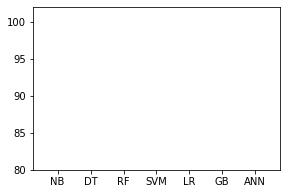

In [49]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [model1.score(X_train, Y_train), model2.score(X_train, Y_train), model3.score(X_train, Y_train),
          model4.score(X_train, Y_train), model5.score(X_train, Y_train), model6.score(X_train, Y_train),
          accuracy_score(Y_train, Y_train.values.ravel())]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)